In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder, Binarizer
from sklearn.datasets import load_digits
import numpy as np

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



In [45]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True )
    df['Embarked'].fillna('N', inplace=True )
    df['Fare'].fillna('0', inplace=True )
    return df

def drop_feature(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_feature(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_feature(df):
    df = fillna(df)
    df = drop_feature(df)
    df = format_feature(df)
    return df


In [46]:
## p 147

class MyDummyClassfier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피쳐가 1이면 0, 그렇지 않으면 1로 예측함.
    
    def predict(self, X):
        pred = np.zeros((X.shape[0]))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] ==1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred


In [47]:
## 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('../data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_feature(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)
myclf = MyDummyClassfier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print(f"Dummy Classfier의 정확도는 {accuracy_score(y_test,mypredictions)}")

Dummy Classfier의 정확도는 0.7877094972067039


C:\Users\kdt\AppData\Local\Temp\ipykernel_18348\2670212347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\kdt\AppData\Local\Temp\ipykernel_18348\2670212347.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [48]:
class MyFakeClassfier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    def predic(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
digits = load_digits()

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [49]:
fakeclf = MyFakeClassfier()
fakeclf.fit(X_train,y_train)
fakepred = fakeclf.predic(X_test)
print(f"{accuracy_score(y_test, fakepred):.3f}")

0.900


In [50]:
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]])

In [51]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    
    print(f"정확도 {accuracy}, 정밀도 {precision}, 재현율{recall}")

In [52]:
## 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할.
titanic_df = pd.read_csv('../data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_feature(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차행렬
[[93 17]
 [20 49]]
정확도 0.7932960893854749, 정밀도 0.7424242424242424, 재현율0.7101449275362319


C:\Users\kdt\AppData\Local\Temp\ipykernel_18348\2670212347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\kdt\AppData\Local\Temp\ipykernel_18348\2670212347.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [53]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f"pred_proba()결과 Shape: {pred_proba.shape}")
print(pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)


pred_proba()결과 Shape: (179, 2)
[[0.8515734  0.1484266 ]
 [0.87164659 0.12835341]
 [0.9239038  0.0760962 ]]


In [54]:
X = [[1, -1, 2], [2, 0, 0], [0, 1.1, 1.2]]
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [55]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
get_clf_eval(y_test, custom_predict)

오차행렬
[[93 17]
 [20 49]]
정확도 0.7932960893854749, 정밀도 0.7424242424242424, 재현율0.7101449275362319


In [56]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold= custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f"임계값', {custom_threshold}")
        get_clf_eval(y_test , custom_predict)
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임계값', 0.4
오차행렬
[[87 23]
 [14 55]]
정확도 0.7932960893854749, 정밀도 0.7051282051282052, 재현율0.7971014492753623
임계값', 0.45
오차행렬
[[91 19]
 [18 51]]
정확도 0.7932960893854749, 정밀도 0.7285714285714285, 재현율0.7391304347826086
임계값', 0.5
오차행렬
[[93 17]
 [20 49]]
정확도 0.7932960893854749, 정밀도 0.7424242424242424, 재현율0.7101449275362319
임계값', 0.55
오차행렬
[[98 12]
 [23 46]]
정확도 0.8044692737430168, 정밀도 0.7931034482758621, 재현율0.6666666666666666
임계값', 0.6
오차행렬
[[101   9]
 [ 26  43]]
정확도 0.8044692737430168, 정밀도 0.8269230769230769, 재현율0.6231884057971014


In [58]:
#레이블 값이 1일 때의 예측 확률을 추출


pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]
precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

print('반환된 분류 결정 임계값 배열의 Shape:', thresholds.shape)


thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index], 2))

print('샘플 임계값별 정밀도:', np.round(precision[thr_index], 3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index], 3))


반환된 분류 결정 임계값 배열의 Shape: (172,)
샘플 추출을 위한 임계값 배열의 index 10개 [  0  15  30  45  60  75  90 105 120 135 150 165]
샘플용 10개의 임곗값: [0.04 0.11 0.13 0.15 0.18 0.24 0.36 0.47 0.61 0.71 0.84 0.93]
샘플 임계값별 정밀도: [0.385 0.409 0.455 0.504 0.562 0.629 0.707 0.731 0.827 0.919 1.    1.   ]
샘플 임계값별 재현율: [1.    0.971 0.957 0.942 0.913 0.884 0.841 0.71  0.623 0.493 0.319 0.101]


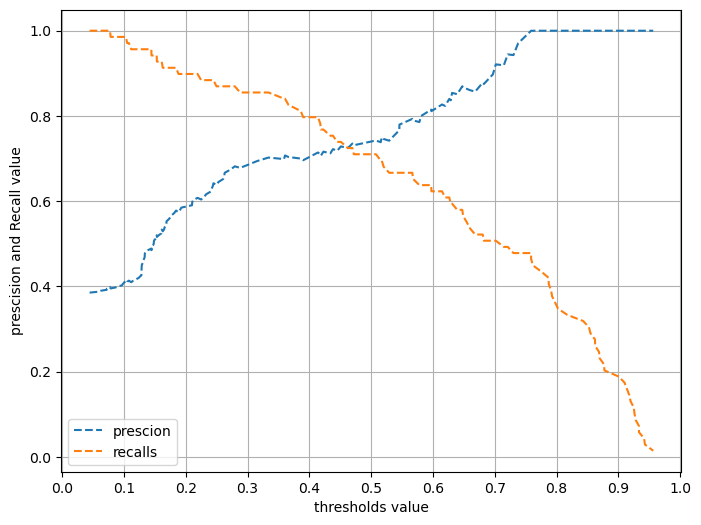

In [60]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:thresholds_boundary], linestyle='--', label='prescion')
    plt.plot(thresholds, recalls[0:thresholds_boundary], linestyle='--', label='recalls')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end, 0.1), 2))
    
    plt.xlabel('thresholds value'); plt.ylabel("prescision and Recall value")
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
    
    
             
    